In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
%%time
path = "/content/drive/My Drive/SharedTasksParticipation/SharedTask@Constraint@AAAI2021/"
train_filename= path + "Constraint_English_Train.xlsx"
val_filename = path + "Constraint_English_Val.xlsx"
test_filename = path + "Constraint_English_Test.xlsx"

train = pd.read_excel(train_filename)
val = pd.read_excel(val_filename)
test = pd.read_excel(test_filename)

CPU times: user 369 ms, sys: 5.81 ms, total: 375 ms
Wall time: 3.69 s


In [ ]:
print(train.head(5))
print(val.head(5))
print(test.head(5))

   id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real
   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real
   id                                              tweet
0   1  Our daily update is published. States reported...
1   2             Alfalfa is the only cure for COVID-19.
2   3  President Trump Asked What He Would Do If He W...
3   4  States re

In [ ]:
train['tweet'] = train['tweet'].map(lambda x: cleantext(x))
val['tweet'] = val['tweet'].map(lambda x: cleantext(x))
test['cleaned'] = test['tweet'].map(lambda x: cleantext(x))

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

SVM
val:
[[942  78]
 [187 933]]
              precision    recall  f1-score   support

        fake       0.83      0.92      0.88      1020
        real       0.92      0.83      0.88      1120

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140

Accuracy :  0.8761682242990654
Precison :  0.8807774827220608
Recall :  0.8761682242990654
F1 :  0.8761947508779404


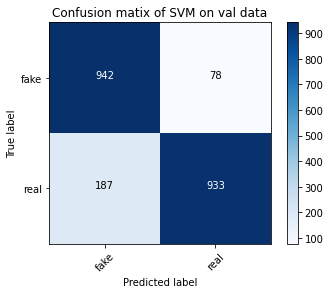

In [ ]:
pipeline = Pipeline([
        ('bow', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),  
        ('tfidf', TfidfTransformer()),  
        ('c', SVC())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('SVM')
print ('val:')
pred=pipeline.predict(val['tweet'])
print_metrices(pred,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')

val_ori = pd.read_excel(val_filename)
svm_val_misclass_df = val_ori[pred!=val['label']]

In [ ]:
pred_test = pipeline.predict(test['cleaned'])
pred_test

array(['real', 'fake', 'fake', ..., 'real', 'real', 'real'], dtype=object)

In [ ]:
print(pred_test.shape, len(test.cleaned))

(2140,) 2140


In [ ]:
test['label']=pred_test

In [ ]:
test.head(10)

,id,tweet,cleaned,label
0,1,Our daily update is published. States reported...,daily update published states reported 734k te...,real
1,2,Alfalfa is the only cure for COVID-19.,alfalfa cure covid 19,fake
2,3,President Trump Asked What He Would Do If He W...,president trump asked would catch coronavirus ...,fake
3,4,States reported 630 deaths. We are still seein...,states reported 630 deaths still seeing solid ...,real
4,5,This is the sixth time a global health emergen...,sixth time global health emergency declared in...,real
5,6,Low #vitaminD was an independent predictor of ...,low vitamind independent predictor worse progn...,fake
6,7,A common question: why are the cumulative outc...,common question cumulative outcome numbers sma...,real
7,8,The government should consider bringing in any...,government consider bringing new national lock...,fake
8,9,Our daily update is published. We’ve now track...,daily update published tracked 2 9 million tes...,real
9,10,Breakdown of testing: 4 air crew 97 hotel &amp...,breakdown testing 4 air crew 97 hotel amp heal...,real


In [ ]:
test[['id','label']]

,id,label
0,1,real
1,2,fake
2,3,fake
3,4,real
4,5,real
...,...,...
2135,2136,real
2136,2137,fake
2137,2138,real
2138,2139,real


In [ ]:
test['label'].value_counts()

real    1094
fake    1046
Name: label, dtype: int64

# Prediction on validation Set

In [ ]:
with open('svm(94.62).txt', 'w') as f:
  f.write("id,label\n")
  for i in range(len(pred_test)):
    id = test['id'][i]
    v = pred_test[i]
    f.write("%d,%s\n"%(id, v))